<a href="https://colab.research.google.com/github/abhimanyu922/Time-series-analysis-TSA-/blob/main/TimeSereis_Stats_Complete_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis - A statistical model guide

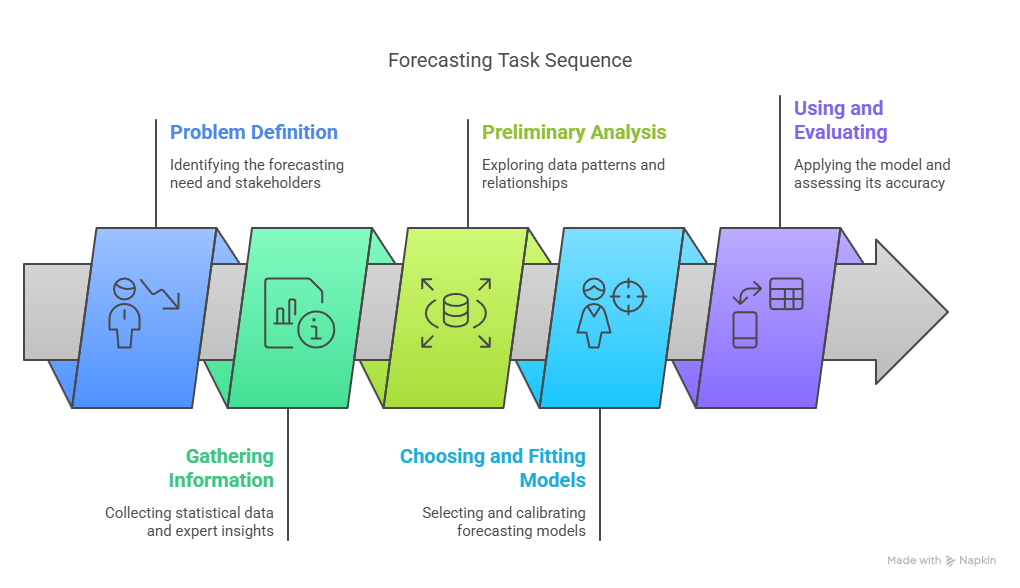

## 0. Importing Libraries and Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load dataset
df = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
df.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# change name of column from #Passengers to Passengers
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 1. Descriptive Analysis & Decomposition

### 1.a Time Series Plotting

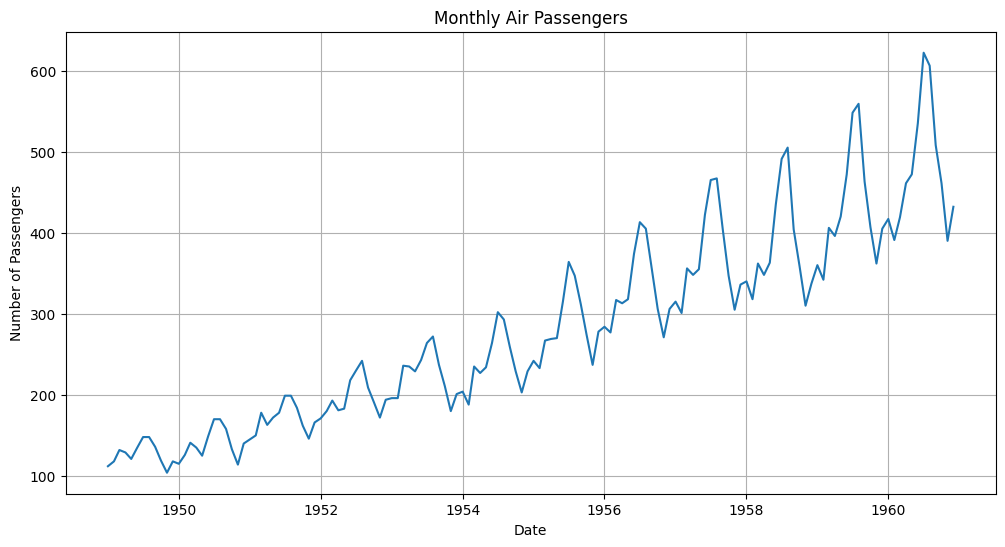

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'])
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


### 1.b Rolling Statistics (Moving Average and Standard Deviation)

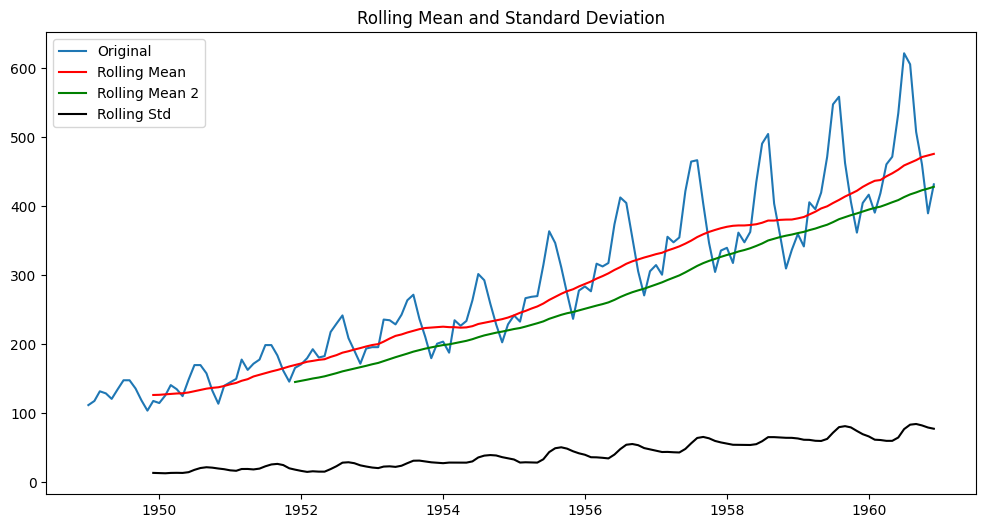

In [ ]:
rolling_mean = df['Passengers'].rolling(window=12).mean()
rolling_std = df['Passengers'].rolling(window=12).std()
rolling_mean_2 = df['Passengers'].rolling(window=36).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_mean_2, color='green', label='Rolling Mean 2')

plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show()


In [ ]:
rolling_mean.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


### 1.c Seasonal Decomposition (Classical Decomposition)


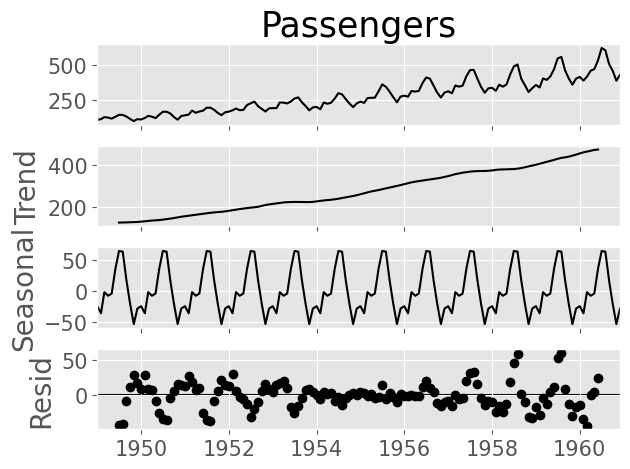

In [ ]:
result = seasonal_decompose(df['Passengers'], model='additive', period=12)
result.plot()
plt.show()


### 1.d Additive vs Multiplicative Decomposition

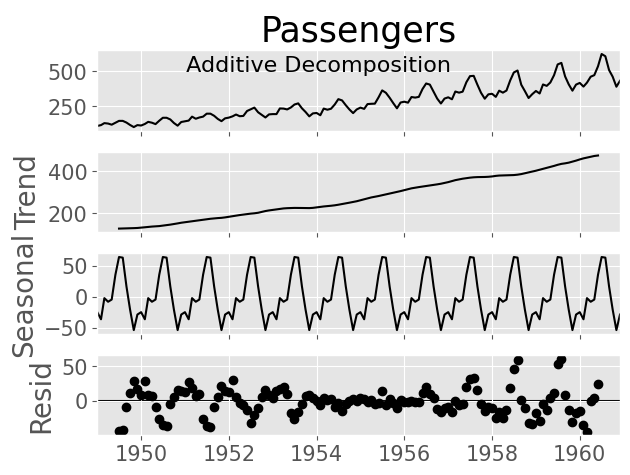

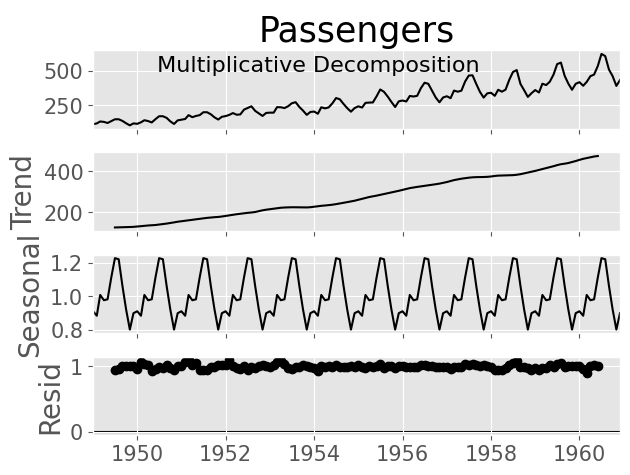

In [ ]:
# Additive
add_result = seasonal_decompose(df['Passengers'], model='additive', period=12)
add_result.plot()
plt.suptitle('\n\n Additive Decomposition', fontsize=16)
plt.show()

# Multiplicative
mult_result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
mult_result.plot()
plt.suptitle('\n\n Multiplicative Decomposition', fontsize=16)
plt.show()


## 2. Stationarity Tests

### 2.a Augmented Dickey Fuller (ADF) Test

- Check stationarity

- Hypothesis:
    - - H0: Series is non-stationary
    - - H1: Series is stationary

     Yt = @ Yt-1 + beta(X)e + error

In [ ]:
result = adfuller(df['Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis — Data is stationary")
else:
    print("Weak evidence against the null hypothesis — Data is non-stationary")


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Weak evidence against the null hypothesis — Data is non-stationary


### 2.b Variance Ratio Test (Optional)

In [ ]:
# Do it

## New Section

## 3. Autocorrelation & Dependency

### 3.a Autocorrelation Function (ACF)
- Identifying Moving Avergae (MA)
- Slow decay : Going down slowly : Non -stationary
- ACF drops after lag 1 or lag 2 : MA(1) model or MA(2) model

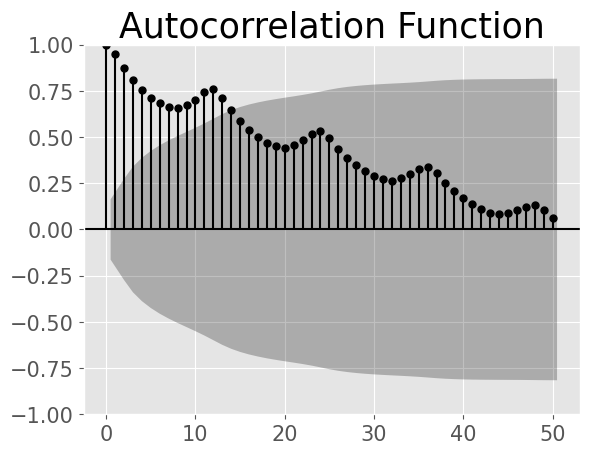

In [ ]:
plot_acf(df['Passengers'], lags=50)
plt.title('Autocorrelation Function')
plt.show()


### 3.b Partial Autocorrelation Function (PACF)
- Identify Autoregressive(AR) part
- PACF drops after lag 1 or lag 2 : AR(1) model or AR(2) model

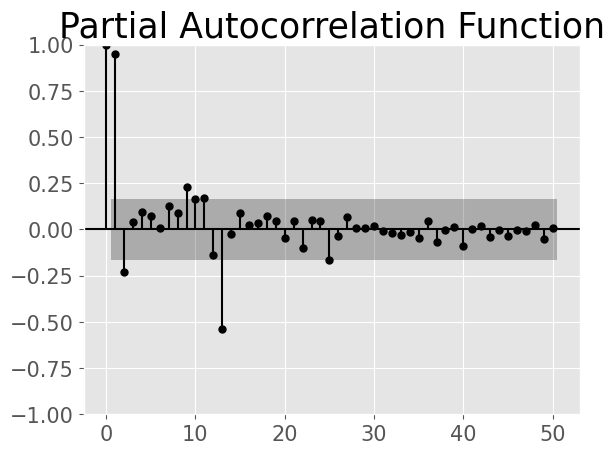

In [ ]:
plot_pacf(df['Passengers'], lags=50, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.show()


## 4. Smoothing Methods

- **Noise** : short-term random fluctuations

- Removal of 'Noise' : random varaitions

### 4.a Simple Moving Average (SMA)

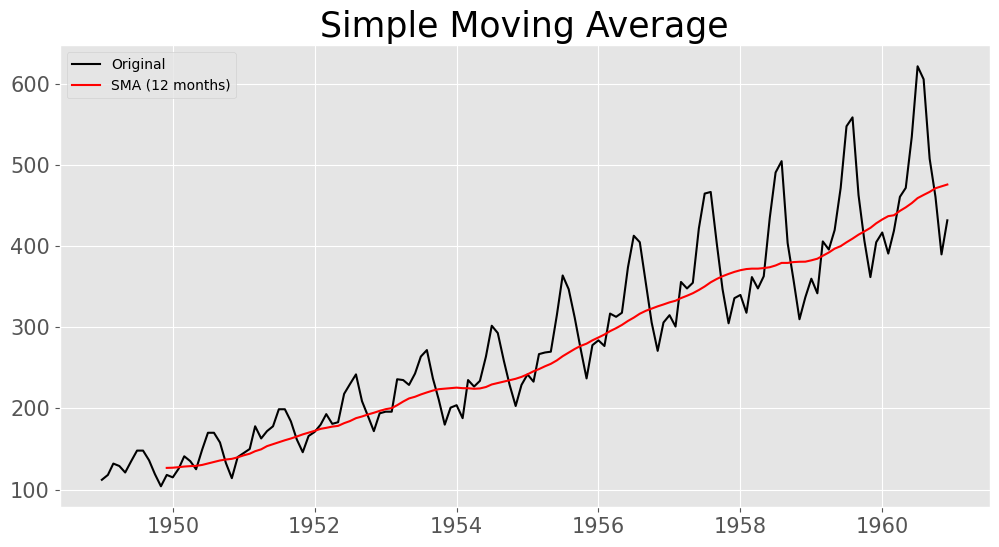

In [ ]:
sma = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(sma, color='red', label='SMA (12 months)')
plt.legend()
plt.title('Simple Moving Average')
plt.show()


### 4.b Weighted Moving Average (WMA)

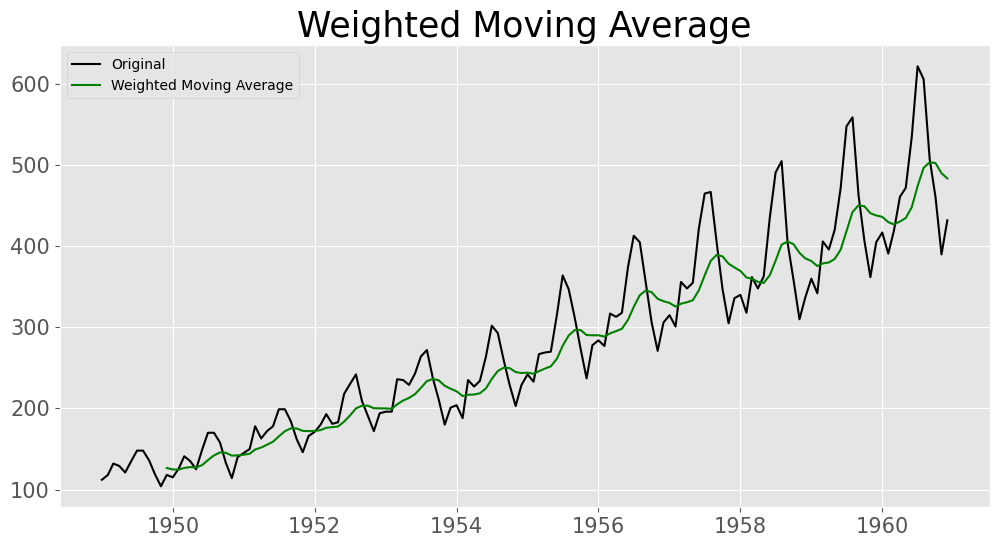

In [ ]:
weights = np.arange(1,13)
wma = df['Passengers'].rolling(12).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(wma, color='green', label='Weighted Moving Average')
plt.legend()
plt.title('Weighted Moving Average')
plt.show()


In [ ]:
wma.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


### 4.c Exponential Moving Average (EMA)

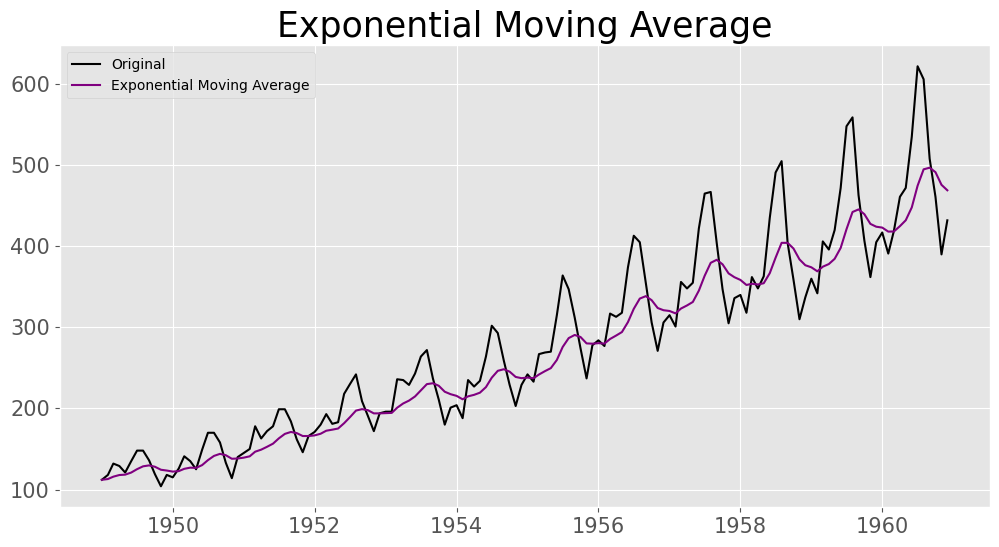

In [ ]:
ema = df['Passengers'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(ema, color='purple', label='Exponential Moving Average')
plt.legend()
plt.title('Exponential Moving Average')
plt.show()


### 4.d Exponential Smoothing (SES, Holt’s Linear, Holt-Winter’s)

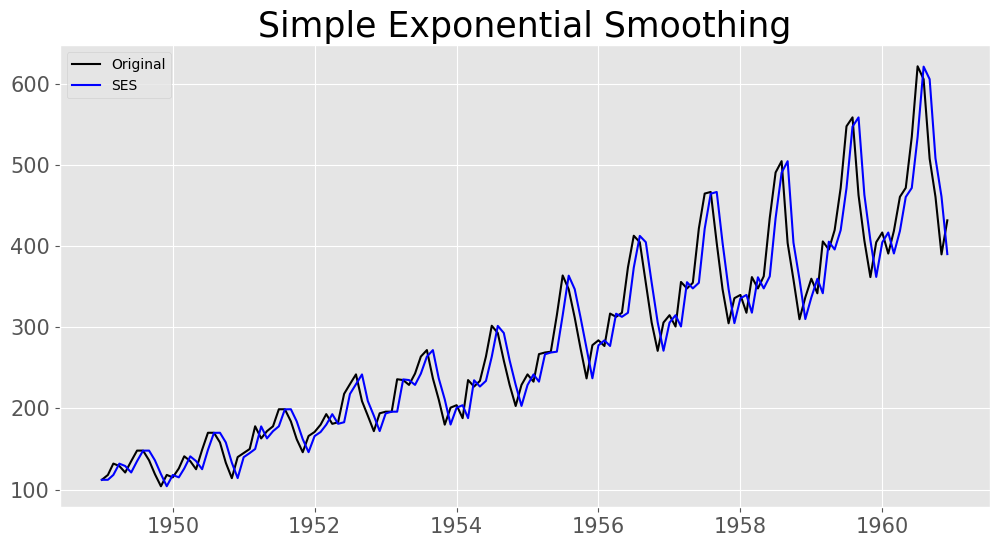

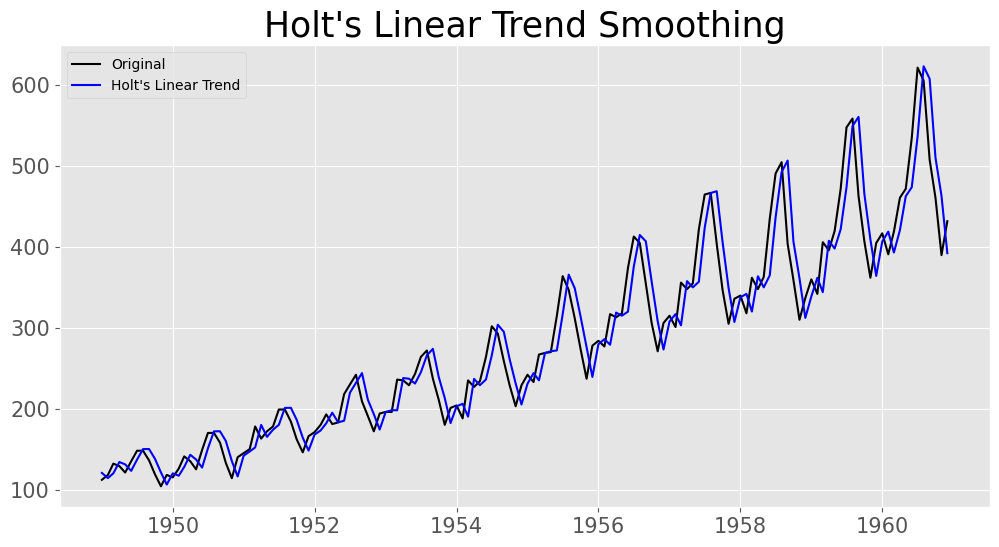

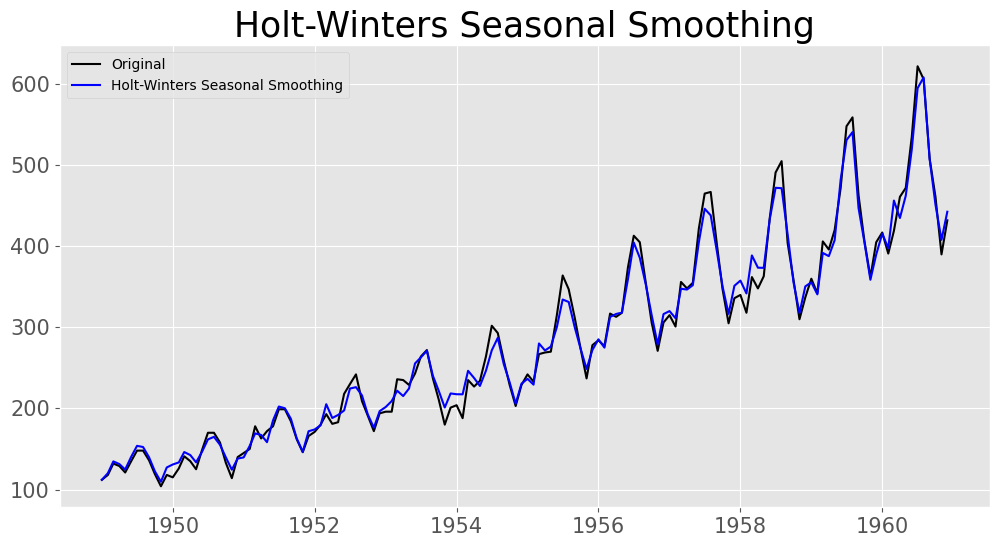

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Simple Exponential Smoothing
model = SimpleExpSmoothing(df['Passengers']).fit()
ses = model.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(ses, label='SES', color = 'blue')
plt.legend()
plt.title('Simple Exponential Smoothing')
plt.show()

# Holt’s Linear Trend Method
model_holt = ExponentialSmoothing(df['Passengers'], trend='add', seasonal=None).fit()
holt = model_holt.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(holt, label="Holt's Linear Trend", color = 'blue')
plt.legend()
plt.title("Holt's Linear Trend Smoothing")
plt.show()

# Holt-Winters Seasonal Method
model_hw = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
hw = model_hw.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(hw, label="Holt-Winters Seasonal Smoothing", color = 'blue')
plt.legend()
plt.title("Holt-Winters Seasonal Smoothing")
plt.show()


# Time Series Forecasting Method Selection

Here's a guide on choosing the appropriate forecasting method based on the characteristics of your time series data:

## 1. Simple Exponential Smoothing (SES)

**When to use:**

* The time series data has **no clear trend or seasonality**.
* You need a simple and easy-to-implement forecasting method.

**Reasoning:** SES gives more weight to recent observations, making it suitable for data with random fluctuations.

**Example:** Forecasting daily sales of a product with relatively stable demand.


## 2. Holt's Linear Method

**When to use:**

* The time series data has a **trend but no seasonality**.
* You need a method that can capture and extrapolate the trend.

**Reasoning:** Holt's Linear method adds a trend component to SES, allowing for trend-based adjustments.

**Example:** Forecasting the monthly growth of website traffic with a consistent upward trend.


## 3. Holt-Winters' Seasonal Method

**When to use:**

* The time series data exhibits both **trend and seasonality**.
* You need a model that can capture both patterns for accurate predictions.

**Reasoning:** Holt-Winters' Seasonal method includes a seasonal component to account for repeating patterns.

**Example:** Forecasting the quarterly sales of ice cream, with higher sales in summer and an overall increasing trend.


## Summary Table:

| Method | Trend | Seasonality |
|---|---|---|
| SES | No | No |
| Holt's Linear | Yes | No |
| Holt-Winters' Seasonal | Yes | Yes |

## 5. Trend & Seasonality (Advanced Decomposition)

### 5.a Seasonal Decomposition using STL (LOESS)

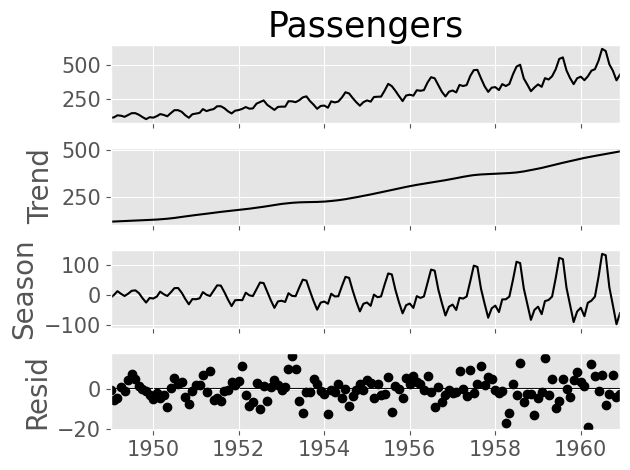

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(df['Passengers'], seasonal=13)
result = stl.fit()

result.plot()
plt.show()


# Forecasting:
 - **Holt's Linear** - Only trend, no seasonality
 - **Holt's Winters Seasonal** - Trend + Seasonality

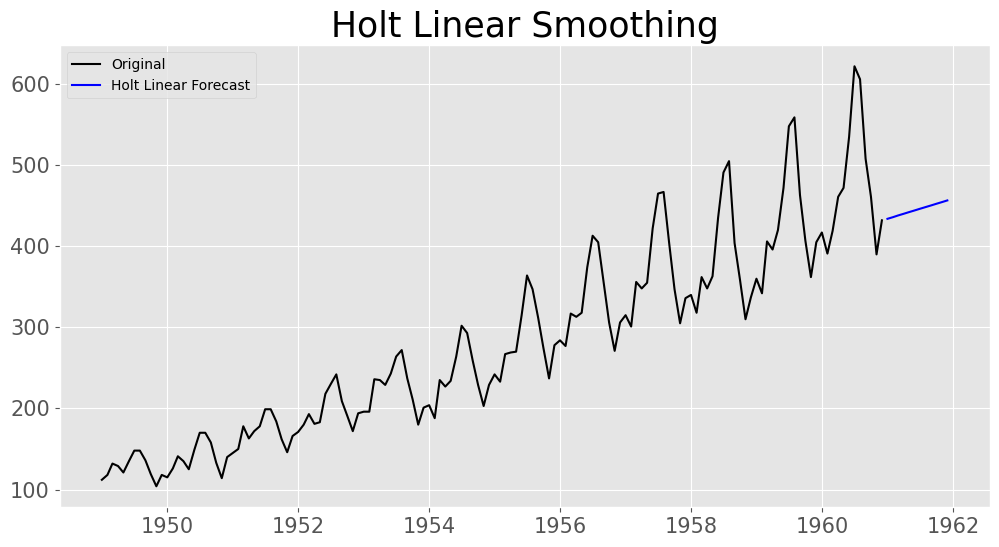

In [ ]:
# Holt's Linear  forecasting

model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal_periods=12).fit()
forecast = model.forecast(12)

# plot the forecast
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(forecast, label='Holt Linear Forecast', color = 'blue')
plt.legend()
plt.title("Holt Linear Smoothing")
plt.show()

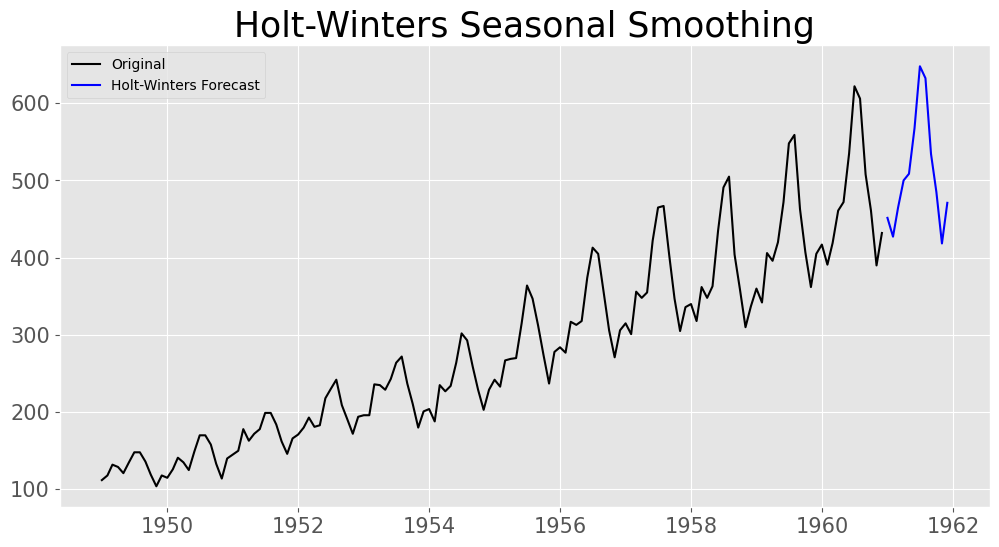

In [ ]:
# Holt's Winter
model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast = model.forecast(12)

#plot the results
plt.figure(figsize=(12,6))
plt.plot(df['Passengers'], label='Original')
plt.plot(forecast, label='Holt-Winters Forecast', color = 'blue')
plt.legend()
plt.title("Holt-Winters Seasonal Smoothing")
plt.show()